In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import Callback
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import pandas as pd

# (1) batch size = 128

## (1-1)시퀀스 길이=10 / 슬라이딩=5

In [2]:
TIMESTEPS = 10 # 10 or 20
EPOCHS = 10
BATCH_SIZE = 128 # 32 or 64 or 128
STEPS = int(TIMESTEPS/2) # TIMESTEPS or int(TIMESTPES / 2)

In [5]:
# 데이터 로드
df_merged = pd.read_csv('../data/final_data.csv')

# 데이터 준비
df = df_merged.copy()

# Feature와 Target 분리
X = df.drop(columns=['trade_price_10min_later']).values
y = df['trade_price_10min_later'].values

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 시계열 데이터 형식으로 변환 (샘플 간 공유 없음)
timesteps = TIMESTEPS
X_sequences, y_sequences = [], []

# i를 timesteps 크기만큼 건너뛰며 샘플 생성
for i in range(0, len(X_scaled) - timesteps, STEPS):
    X_sequences.append(X_scaled[i:i+timesteps])
    y_sequences.append(y[i+timesteps])

X_sequences = np.array(X_sequences, dtype=np.float32)
y_sequences = np.array(y_sequences)

# Train, Test 분할 (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X_sequences, y_sequences, test_size=0.2, random_state=1, shuffle=True)

# 분할 비율 출력
print(f"Train set: {X_train.shape}, Test set: {X_test.shape}")

Train set: (631062, 10, 18), Test set: (157766, 10, 18)


Training Progress:   0%|                                                                        | 0/10 [00:00<?, ?it/s]

Epoch 1/10
4930/4931 [============================>.] - ETA: 0s - loss: 0.6875 - accuracy: 0.5252

Training Progress:  10%|█████                                              | 1/10 [03:54<35:06, 234.07s/it, loss=0.687]

4931/4931 [==============================] - 234s 45ms/step - loss: 0.6875 - accuracy: 0.5252 - val_loss: 0.6867 - val_accuracy: 0.5282
Epoch 2/10
4930/4931 [============================>.] - ETA: 0s - loss: 0.6856 - accuracy: 0.5319

Training Progress:  20%|██████████▏                                        | 2/10 [07:23<29:15, 219.47s/it, loss=0.686]

4931/4931 [==============================] - 209s 42ms/step - loss: 0.6856 - accuracy: 0.5319 - val_loss: 0.6845 - val_accuracy: 0.5339
Epoch 3/10
4930/4931 [============================>.] - ETA: 0s - loss: 0.6838 - accuracy: 0.5375

Training Progress:  30%|███████████████▎                                   | 3/10 [11:11<26:03, 223.32s/it, loss=0.684]

4931/4931 [==============================] - 228s 46ms/step - loss: 0.6838 - accuracy: 0.5375 - val_loss: 0.6827 - val_accuracy: 0.5413
Epoch 4/10
4931/4931 [==============================] - ETA: 0s - loss: 0.6815 - accuracy: 0.5442

Training Progress:  40%|████████████████████▍                              | 4/10 [14:50<22:11, 221.87s/it, loss=0.681]

4931/4931 [==============================] - 220s 45ms/step - loss: 0.6815 - accuracy: 0.5442 - val_loss: 0.6807 - val_accuracy: 0.5490
Epoch 5/10
4930/4931 [============================>.] - ETA: 0s - loss: 0.6783 - accuracy: 0.5512

Training Progress:  50%|█████████████████████████▌                         | 5/10 [18:28<18:21, 220.28s/it, loss=0.678]

4931/4931 [==============================] - 217s 44ms/step - loss: 0.6783 - accuracy: 0.5512 - val_loss: 0.6776 - val_accuracy: 0.5544
Epoch 6/10
4930/4931 [============================>.] - ETA: 0s - loss: 0.6747 - accuracy: 0.5589

Training Progress:  60%|██████████████████████████████▌                    | 6/10 [21:53<14:21, 215.29s/it, loss=0.675]

4931/4931 [==============================] - 206s 42ms/step - loss: 0.6747 - accuracy: 0.5590 - val_loss: 0.6758 - val_accuracy: 0.5568
Epoch 7/10
4929/4931 [============================>.] - ETA: 0s - loss: 0.6707 - accuracy: 0.5651

Training Progress:  70%|███████████████████████████████████▋               | 7/10 [24:42<09:59, 199.90s/it, loss=0.671]

4931/4931 [==============================] - 168s 34ms/step - loss: 0.6707 - accuracy: 0.5651 - val_loss: 0.6739 - val_accuracy: 0.5604
Epoch 8/10
4930/4931 [============================>.] - ETA: 0s - loss: 0.6668 - accuracy: 0.5723

Training Progress:  80%|████████████████████████████████████████▊          | 8/10 [27:32<06:21, 190.64s/it, loss=0.667]

4931/4931 [==============================] - 171s 35ms/step - loss: 0.6668 - accuracy: 0.5723 - val_loss: 0.6703 - val_accuracy: 0.5670
Epoch 9/10
4929/4931 [============================>.] - ETA: 0s - loss: 0.6623 - accuracy: 0.5788

Training Progress:  90%|█████████████████████████████████████████████▉     | 9/10 [30:27<03:05, 185.49s/it, loss=0.662]

4931/4931 [==============================] - 174s 35ms/step - loss: 0.6623 - accuracy: 0.5788 - val_loss: 0.6671 - val_accuracy: 0.5731
Epoch 10/10
4931/4931 [==============================] - ETA: 0s - loss: 0.6584 - accuracy: 0.5840

Training Progress: 100%|██████████████████████████████████████████████████| 10/10 [33:19<00:00, 181.42s/it, loss=0.658]

4931/4931 [==============================] - 172s 35ms/step - loss: 0.6584 - accuracy: 0.5840 - val_loss: 0.6658 - val_accuracy: 0.5761


Training Progress: 100%|██████████████████████████████████████████████████| 10/10 [33:19<00:00, 199.95s/it, loss=0.658]


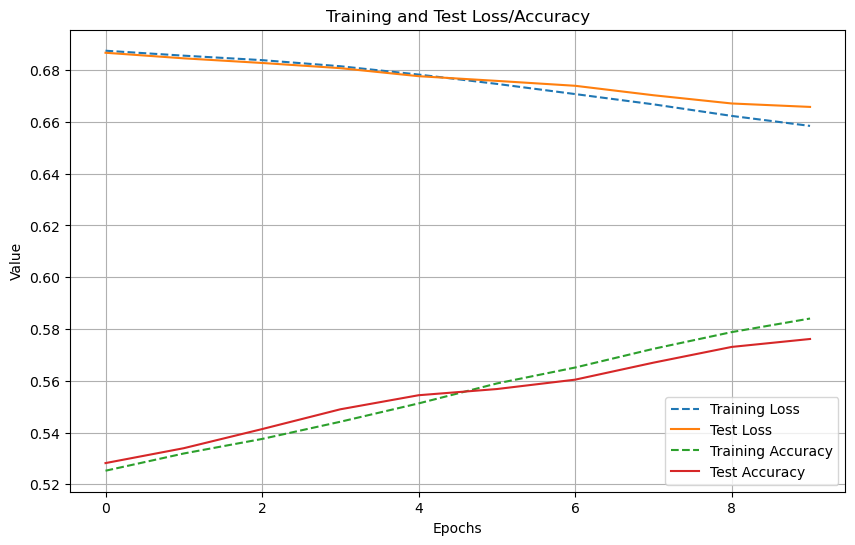

In [7]:
# LSTM 모델 구성

model = Sequential([
    LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    Dropout(0.2),
    LSTM(64, return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 학습 진행을 표시하기 위한 Callback 설정
class TQDMProgressBar(Callback):
    def on_train_begin(self, logs=None):
        self.epochs = self.params['epochs']
        self.tqdm = tqdm(total=self.epochs, desc='Training Progress')

    def on_epoch_end(self, epoch, logs=None):
        self.tqdm.update(1)
        self.tqdm.set_postfix(loss=logs['loss'])

    def on_train_end(self, logs=None):
        self.tqdm.close()

# 학습 과정 시각화 및 히스토리 저장
tqdm_callback = TQDMProgressBar()
history = model.fit(
    X_train, y_train, 
    validation_data=(X_test, y_test),
    epochs=EPOCHS, 
    batch_size=BATCH_SIZE, 
    callbacks=[tqdm_callback]
)

# Loss 및 Accuracy 그래프
plt.figure(figsize=(10, 6))

# Training 및 Test Loss
plt.plot(history.history['loss'], label='Training Loss', linestyle='--')
plt.plot(history.history['val_loss'], label='Test Loss', linestyle='-')

# Training 및 Test Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy', linestyle='--')
plt.plot(history.history['val_accuracy'], label='Test Accuracy', linestyle='-')

# 그래프 설정
plt.title('Training and Test Loss/Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

plt.show()

In [9]:
# 최종 평가 (Test Set)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

Test Loss: 0.6658, Test Accuracy: 0.5761


## (1-2) 시퀀스 길이=10 / 슬라이딩=10

In [ ]:
TIMESTEPS = 10 # 10 or 20
EPOCHS = 10
BATCH_SIZE = 128 # 32 or 64 or 128
STEPS = TIMESTEPS # TIMESTEPS or int(TIMESTPES / 2)

Training Progress:   0%|                                                                        | 0/10 [00:00<?, ?it/s]

Epoch 1/10
4930/4931 [============================>.] - ETA: 0s - loss: 0.6875 - accuracy: 0.5252

Training Progress:  10%|█████                                              | 1/10 [03:54<35:06, 234.07s/it, loss=0.687]

4931/4931 [==============================] - 234s 45ms/step - loss: 0.6875 - accuracy: 0.5252 - val_loss: 0.6867 - val_accuracy: 0.5282
Epoch 2/10
4930/4931 [============================>.] - ETA: 0s - loss: 0.6856 - accuracy: 0.5319

Training Progress:  20%|██████████▏                                        | 2/10 [07:23<29:15, 219.47s/it, loss=0.686]

4931/4931 [==============================] - 209s 42ms/step - loss: 0.6856 - accuracy: 0.5319 - val_loss: 0.6845 - val_accuracy: 0.5339
Epoch 3/10
4930/4931 [============================>.] - ETA: 0s - loss: 0.6838 - accuracy: 0.5375

Training Progress:  30%|███████████████▎                                   | 3/10 [11:11<26:03, 223.32s/it, loss=0.684]

4931/4931 [==============================] - 228s 46ms/step - loss: 0.6838 - accuracy: 0.5375 - val_loss: 0.6827 - val_accuracy: 0.5413
Epoch 4/10
4931/4931 [==============================] - ETA: 0s - loss: 0.6815 - accuracy: 0.5442

Training Progress:  40%|████████████████████▍                              | 4/10 [14:50<22:11, 221.87s/it, loss=0.681]

4931/4931 [==============================] - 220s 45ms/step - loss: 0.6815 - accuracy: 0.5442 - val_loss: 0.6807 - val_accuracy: 0.5490
Epoch 5/10
4930/4931 [============================>.] - ETA: 0s - loss: 0.6783 - accuracy: 0.5512

Training Progress:  50%|█████████████████████████▌                         | 5/10 [18:28<18:21, 220.28s/it, loss=0.678]

4931/4931 [==============================] - 217s 44ms/step - loss: 0.6783 - accuracy: 0.5512 - val_loss: 0.6776 - val_accuracy: 0.5544
Epoch 6/10
4930/4931 [============================>.] - ETA: 0s - loss: 0.6747 - accuracy: 0.5589

Training Progress:  60%|██████████████████████████████▌                    | 6/10 [21:53<14:21, 215.29s/it, loss=0.675]

4931/4931 [==============================] - 206s 42ms/step - loss: 0.6747 - accuracy: 0.5590 - val_loss: 0.6758 - val_accuracy: 0.5568
Epoch 7/10
4929/4931 [============================>.] - ETA: 0s - loss: 0.6707 - accuracy: 0.5651

Training Progress:  70%|███████████████████████████████████▋               | 7/10 [24:42<09:59, 199.90s/it, loss=0.671]

4931/4931 [==============================] - 168s 34ms/step - loss: 0.6707 - accuracy: 0.5651 - val_loss: 0.6739 - val_accuracy: 0.5604
Epoch 8/10
4930/4931 [============================>.] - ETA: 0s - loss: 0.6668 - accuracy: 0.5723

Training Progress:  80%|████████████████████████████████████████▊          | 8/10 [27:32<06:21, 190.64s/it, loss=0.667]

4931/4931 [==============================] - 171s 35ms/step - loss: 0.6668 - accuracy: 0.5723 - val_loss: 0.6703 - val_accuracy: 0.5670
Epoch 9/10
4929/4931 [============================>.] - ETA: 0s - loss: 0.6623 - accuracy: 0.5788

Training Progress:  90%|█████████████████████████████████████████████▉     | 9/10 [30:27<03:05, 185.49s/it, loss=0.662]

4931/4931 [==============================] - 174s 35ms/step - loss: 0.6623 - accuracy: 0.5788 - val_loss: 0.6671 - val_accuracy: 0.5731
Epoch 10/10
4931/4931 [==============================] - ETA: 0s - loss: 0.6584 - accuracy: 0.5840

Training Progress: 100%|██████████████████████████████████████████████████| 10/10 [33:19<00:00, 181.42s/it, loss=0.658]

4931/4931 [==============================] - 172s 35ms/step - loss: 0.6584 - accuracy: 0.5840 - val_loss: 0.6658 - val_accuracy: 0.5761


Training Progress: 100%|██████████████████████████████████████████████████| 10/10 [33:19<00:00, 199.95s/it, loss=0.658]


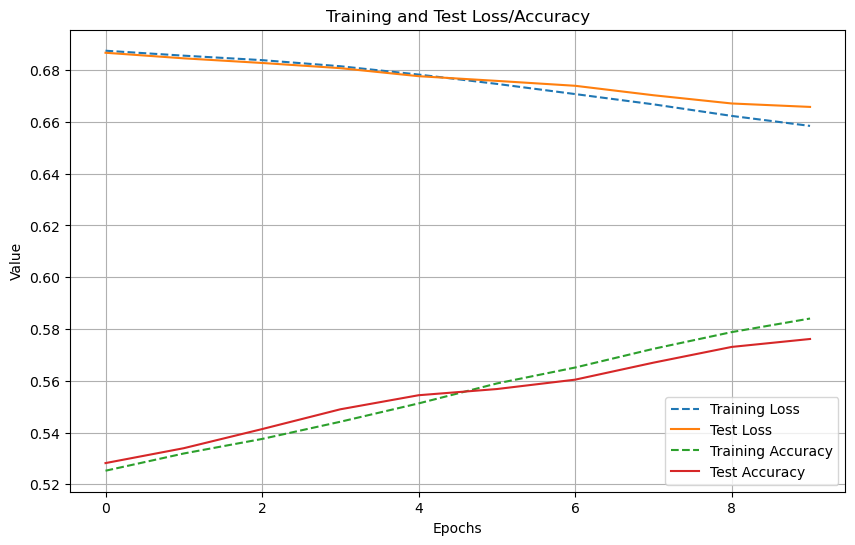

In [7]:
# LSTM 모델 구성
model = Sequential([
    LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    Dropout(0.2),
    LSTM(64, return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 학습 진행을 표시하기 위한 Callback 설정
class TQDMProgressBar(Callback):
    def on_train_begin(self, logs=None):
        self.epochs = self.params['epochs']
        self.tqdm = tqdm(total=self.epochs, desc='Training Progress')

    def on_epoch_end(self, epoch, logs=None):
        self.tqdm.update(1)
        self.tqdm.set_postfix(loss=logs['loss'])

    def on_train_end(self, logs=None):
        self.tqdm.close()

# 학습 과정 시각화 및 히스토리 저장
tqdm_callback = TQDMProgressBar()
history = model.fit(
    X_train, y_train, 
    validation_data=(X_test, y_test),
    epochs=EPOCHS, 
    batch_size=BATCH_SIZE, 
    callbacks=[tqdm_callback]
)

# Loss 및 Accuracy 그래프
plt.figure(figsize=(10, 6))

# Training 및 Test Loss
plt.plot(history.history['loss'], label='Training Loss', linestyle='--')
plt.plot(history.history['val_loss'], label='Test Loss', linestyle='-')

# Training 및 Test Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy', linestyle='--')
plt.plot(history.history['val_accuracy'], label='Test Accuracy', linestyle='-')

# 그래프 설정
plt.title('Training and Test Loss/Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

plt.show()

In [20]:
# 최종 평가 (Test Set)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

Test Loss: 0.6797, Test Accuracy: 0.5537


## (1-3) 시퀀스 길이=20 / 슬라이딩=10

In [27]:
TIMESTEPS = 20 # 10 or 20
EPOCHS = 10
BATCH_SIZE = 128 # 32 or 64 or 128
STEPS = int(TIMESTEPS/2) # TIMESTEPS or int(TIMESTPES / 2)

In [28]:
# 데이터 로드
df_merged = pd.read_csv('../data/final_data.csv')

# 데이터 준비
df = df_merged.copy()

# Feature와 Target 분리
X = df.drop(columns=['trade_price_10min_later']).values
y = df['trade_price_10min_later'].values

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 시계열 데이터 형식으로 변환 (샘플 간 공유 없음)
timesteps = TIMESTEPS
X_sequences, y_sequences = [], []

# i를 timesteps 크기만큼 건너뛰며 샘플 생성
for i in range(0, len(X_scaled) - timesteps, STEPS):
    X_sequences.append(X_scaled[i:i+timesteps])
    y_sequences.append(y[i+timesteps])

X_sequences = np.array(X_sequences, dtype=np.float32)
y_sequences = np.array(y_sequences)

# Train, Test 분할 (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X_sequences, y_sequences, test_size=0.2, random_state=1, shuffle=True)

# 분할 비율 출력
print(f"Train set: {X_train.shape}, Test set: {X_test.shape}")

Train set: (315530, 20, 18), Test set: (78883, 20, 18)


Training Progress:   0%|                                                                        | 0/10 [00:00<?, ?it/s]

Epoch 1/10
2466/2466 [==============================] - ETA: 0s - loss: 0.6880 - accuracy: 0.5232

Training Progress:  10%|█████                                              | 1/10 [02:51<25:39, 171.03s/it, loss=0.688]

2466/2466 [==============================] - 171s 66ms/step - loss: 0.6880 - accuracy: 0.5232 - val_loss: 0.6869 - val_accuracy: 0.5265
Epoch 2/10
2465/2466 [============================>.] - ETA: 0s - loss: 0.6864 - accuracy: 0.5283

Training Progress:  20%|██████████▏                                        | 2/10 [05:40<22:41, 170.18s/it, loss=0.686]

2466/2466 [==============================] - 170s 69ms/step - loss: 0.6864 - accuracy: 0.5283 - val_loss: 0.6863 - val_accuracy: 0.5326
Epoch 3/10
2465/2466 [============================>.] - ETA: 0s - loss: 0.6857 - accuracy: 0.5312

Training Progress:  30%|███████████████▎                                   | 3/10 [08:22<19:25, 166.43s/it, loss=0.686]

2466/2466 [==============================] - 162s 66ms/step - loss: 0.6857 - accuracy: 0.5312 - val_loss: 0.6850 - val_accuracy: 0.5341
Epoch 4/10
2465/2466 [============================>.] - ETA: 0s - loss: 0.6848 - accuracy: 0.5352

Training Progress:  40%|████████████████████▍                              | 4/10 [11:08<16:38, 166.41s/it, loss=0.685]

2466/2466 [==============================] - 166s 67ms/step - loss: 0.6848 - accuracy: 0.5352 - val_loss: 0.6841 - val_accuracy: 0.5365
Epoch 5/10
2465/2466 [============================>.] - ETA: 0s - loss: 0.6836 - accuracy: 0.5390

Training Progress:  50%|█████████████████████████▌                         | 5/10 [13:56<13:54, 166.85s/it, loss=0.684]

2466/2466 [==============================] - 168s 68ms/step - loss: 0.6836 - accuracy: 0.5390 - val_loss: 0.6833 - val_accuracy: 0.5377
Epoch 6/10
2465/2466 [============================>.] - ETA: 0s - loss: 0.6819 - accuracy: 0.5442

Training Progress:  60%|██████████████████████████████▌                    | 6/10 [16:26<10:44, 161.13s/it, loss=0.682]

2466/2466 [==============================] - 150s 61ms/step - loss: 0.6819 - accuracy: 0.5442 - val_loss: 0.6830 - val_accuracy: 0.5437
Epoch 7/10
2465/2466 [============================>.] - ETA: 0s - loss: 0.6801 - accuracy: 0.5490

Training Progress:  70%|████████████████████████████████████▍               | 7/10 [18:59<07:55, 158.54s/it, loss=0.68]

2466/2466 [==============================] - 153s 62ms/step - loss: 0.6801 - accuracy: 0.5490 - val_loss: 0.6816 - val_accuracy: 0.5438
Epoch 8/10
2465/2466 [============================>.] - ETA: 0s - loss: 0.6777 - accuracy: 0.5550

Training Progress:  80%|████████████████████████████████████████▊          | 8/10 [21:29<05:11, 155.79s/it, loss=0.678]

2466/2466 [==============================] - 150s 61ms/step - loss: 0.6777 - accuracy: 0.5550 - val_loss: 0.6796 - val_accuracy: 0.5499
Epoch 9/10
2465/2466 [============================>.] - ETA: 0s - loss: 0.6753 - accuracy: 0.5600

Training Progress:  90%|█████████████████████████████████████████████▉     | 9/10 [24:04<02:35, 155.54s/it, loss=0.675]

2466/2466 [==============================] - 155s 63ms/step - loss: 0.6753 - accuracy: 0.5600 - val_loss: 0.6796 - val_accuracy: 0.5517
Epoch 10/10
2465/2466 [============================>.] - ETA: 0s - loss: 0.6726 - accuracy: 0.5643

Training Progress: 100%|██████████████████████████████████████████████████| 10/10 [26:41<00:00, 155.95s/it, loss=0.673]

2466/2466 [==============================] - 157s 64ms/step - loss: 0.6726 - accuracy: 0.5643 - val_loss: 0.6789 - val_accuracy: 0.5539


Training Progress: 100%|██████████████████████████████████████████████████| 10/10 [26:41<00:00, 160.16s/it, loss=0.673]


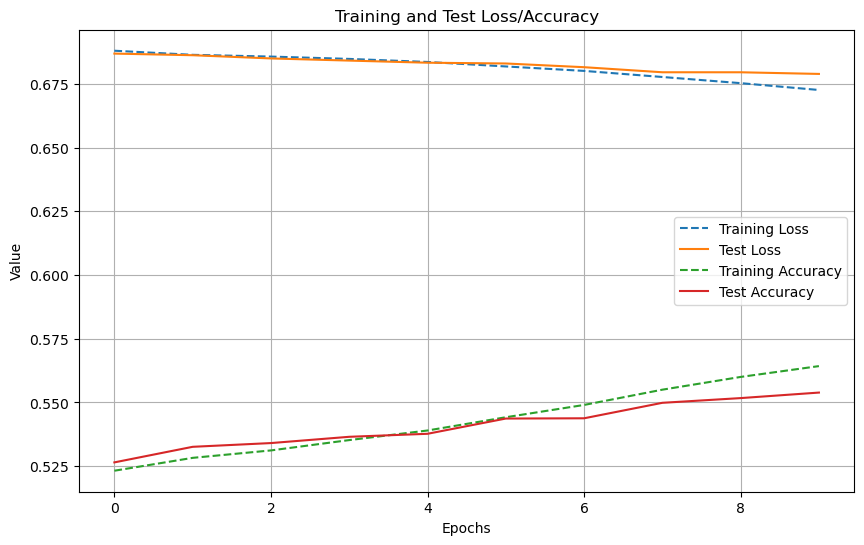

In [31]:
# LSTM 모델 구성

model = Sequential([
    LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    Dropout(0.2),
    LSTM(64, return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 학습 진행을 표시하기 위한 Callback 설정
class TQDMProgressBar(Callback):
    def on_train_begin(self, logs=None):
        self.epochs = self.params['epochs']
        self.tqdm = tqdm(total=self.epochs, desc='Training Progress')

    def on_epoch_end(self, epoch, logs=None):
        self.tqdm.update(1)
        self.tqdm.set_postfix(loss=logs['loss'])

    def on_train_end(self, logs=None):
        self.tqdm.close()

# 학습 과정 시각화 및 히스토리 저장
tqdm_callback = TQDMProgressBar()
history = model.fit(
    X_train, y_train, 
    validation_data=(X_test, y_test),
    epochs=EPOCHS, 
    batch_size=BATCH_SIZE, 
    callbacks=[tqdm_callback]
)

# Loss 및 Accuracy 그래프
plt.figure(figsize=(10, 6))

# Training 및 Test Loss
plt.plot(history.history['loss'], label='Training Loss', linestyle='--')
plt.plot(history.history['val_loss'], label='Test Loss', linestyle='-')

# Training 및 Test Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy', linestyle='--')
plt.plot(history.history['val_accuracy'], label='Test Accuracy', linestyle='-')

# 그래프 설정
plt.title('Training and Test Loss/Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

plt.show()

In [32]:
# 최종 평가 (Test Set)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

Test Loss: 0.6789, Test Accuracy: 0.5539


## (1-4) 시퀀스 길이=20 / 슬라이딩=20

In [43]:
TIMESTEPS = 20 # 10 or 20
EPOCHS = 10
BATCH_SIZE = 128 # 32 or 64 or 128
STEPS = TIMESTEPS # TIMESTEPS or int(TIMESTPES / 2)

In [45]:
# 데이터 로드
df_merged = pd.read_csv('../data/final_data.csv')

# 데이터 준비
df = df_merged.copy()

# Feature와 Target 분리
X = df.drop(columns=['trade_price_10min_later']).values
y = df['trade_price_10min_later'].values

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 시계열 데이터 형식으로 변환 (샘플 간 공유 없음)
timesteps = TIMESTEPS
X_sequences, y_sequences = [], []

# i를 timesteps 크기만큼 건너뛰며 샘플 생성
for i in range(0, len(X_scaled) - timesteps, STEPS):
    X_sequences.append(X_scaled[i:i+timesteps])
    y_sequences.append(y[i+timesteps])

X_sequences = np.array(X_sequences, dtype=np.float32)
y_sequences = np.array(y_sequences)

# Train, Test 분할 (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X_sequences, y_sequences, test_size=0.2, random_state=1, shuffle=True)

# 분할 비율 출력
print(f"Train set: {X_train.shape}, Test set: {X_test.shape}")

Train set: (157765, 20, 18), Test set: (39442, 20, 18)


Training Progress:   0%|                                                                        | 0/10 [00:00<?, ?it/s]

Epoch 1/10
1233/1233 [==============================] - ETA: 0s - loss: 0.6889 - accuracy: 0.5218

Training Progress:  10%|█████▏                                              | 1/10 [01:36<14:30, 96.77s/it, loss=0.689]

1233/1233 [==============================] - 97s 71ms/step - loss: 0.6889 - accuracy: 0.5218 - val_loss: 0.6881 - val_accuracy: 0.5129
Epoch 2/10
1232/1233 [============================>.] - ETA: 0s - loss: 0.6871 - accuracy: 0.5258

Training Progress:  20%|██████████▍                                         | 2/10 [02:57<11:40, 87.50s/it, loss=0.687]

1233/1233 [==============================] - 81s 66ms/step - loss: 0.6871 - accuracy: 0.5259 - val_loss: 0.6870 - val_accuracy: 0.5265
Epoch 3/10
1232/1233 [============================>.] - ETA: 0s - loss: 0.6865 - accuracy: 0.5287

Training Progress:  30%|███████████████▌                                    | 3/10 [04:19<09:53, 84.82s/it, loss=0.686]

1233/1233 [==============================] - 82s 66ms/step - loss: 0.6865 - accuracy: 0.5287 - val_loss: 0.6867 - val_accuracy: 0.5282
Epoch 4/10
1232/1233 [============================>.] - ETA: 0s - loss: 0.6858 - accuracy: 0.5325

Training Progress:  40%|████████████████████▊                               | 4/10 [05:35<08:07, 81.30s/it, loss=0.686]

1233/1233 [==============================] - 76s 62ms/step - loss: 0.6859 - accuracy: 0.5325 - val_loss: 0.6870 - val_accuracy: 0.5283
Epoch 5/10
1232/1233 [============================>.] - ETA: 0s - loss: 0.6852 - accuracy: 0.5335

Training Progress:  50%|██████████████████████████                          | 5/10 [06:53<06:40, 80.10s/it, loss=0.685]

1233/1233 [==============================] - 78s 63ms/step - loss: 0.6852 - accuracy: 0.5335 - val_loss: 0.6861 - val_accuracy: 0.5300
Epoch 6/10
1232/1233 [============================>.] - ETA: 0s - loss: 0.6848 - accuracy: 0.5371

Training Progress:  60%|███████████████████████████████▏                    | 6/10 [08:10<05:16, 79.06s/it, loss=0.685]

1233/1233 [==============================] - 77s 62ms/step - loss: 0.6848 - accuracy: 0.5371 - val_loss: 0.6854 - val_accuracy: 0.5337
Epoch 7/10
1232/1233 [============================>.] - ETA: 0s - loss: 0.6838 - accuracy: 0.5401

Training Progress:  70%|████████████████████████████████████▍               | 7/10 [09:28<03:56, 78.76s/it, loss=0.684]

1233/1233 [==============================] - 78s 63ms/step - loss: 0.6838 - accuracy: 0.5401 - val_loss: 0.6869 - val_accuracy: 0.5308
Epoch 8/10
1232/1233 [============================>.] - ETA: 0s - loss: 0.6827 - accuracy: 0.5426

Training Progress:  80%|█████████████████████████████████████████▌          | 8/10 [10:47<02:37, 78.71s/it, loss=0.683]

1233/1233 [==============================] - 79s 64ms/step - loss: 0.6827 - accuracy: 0.5426 - val_loss: 0.6870 - val_accuracy: 0.5347
Epoch 9/10
1232/1233 [============================>.] - ETA: 0s - loss: 0.6819 - accuracy: 0.5444

Training Progress:  90%|██████████████████████████████████████████████▊     | 9/10 [12:06<01:18, 78.87s/it, loss=0.682]

1233/1233 [==============================] - 79s 64ms/step - loss: 0.6819 - accuracy: 0.5445 - val_loss: 0.6859 - val_accuracy: 0.5390
Epoch 10/10
1232/1233 [============================>.] - ETA: 0s - loss: 0.6803 - accuracy: 0.5480

Training Progress: 100%|████████████████████████████████████████████████████| 10/10 [13:26<00:00, 79.32s/it, loss=0.68]

1233/1233 [==============================] - 80s 65ms/step - loss: 0.6803 - accuracy: 0.5480 - val_loss: 0.6857 - val_accuracy: 0.5402


Training Progress: 100%|████████████████████████████████████████████████████| 10/10 [13:26<00:00, 80.66s/it, loss=0.68]


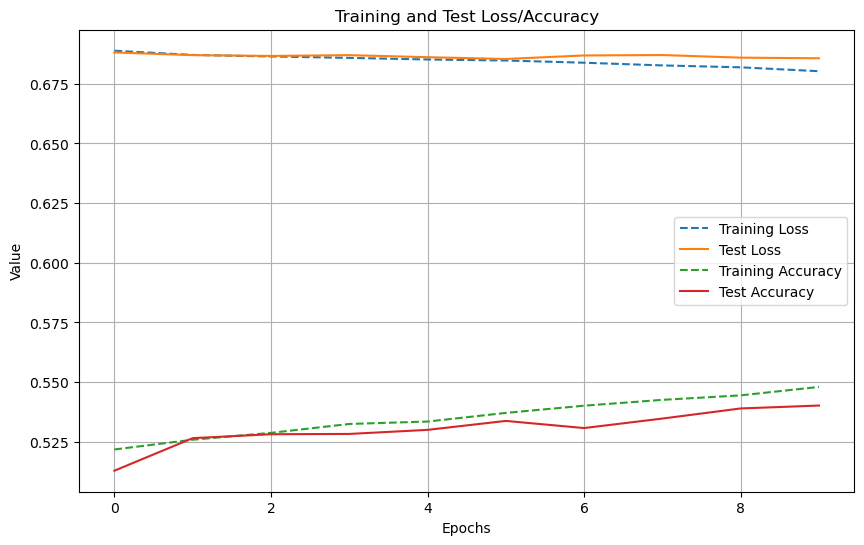

In [46]:
# LSTM 모델 구성

model = Sequential([
    LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    Dropout(0.2),
    LSTM(64, return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 학습 진행을 표시하기 위한 Callback 설정
class TQDMProgressBar(Callback):
    def on_train_begin(self, logs=None):
        self.epochs = self.params['epochs']
        self.tqdm = tqdm(total=self.epochs, desc='Training Progress')

    def on_epoch_end(self, epoch, logs=None):
        self.tqdm.update(1)
        self.tqdm.set_postfix(loss=logs['loss'])

    def on_train_end(self, logs=None):
        self.tqdm.close()

# 학습 과정 시각화 및 히스토리 저장
tqdm_callback = TQDMProgressBar()
history = model.fit(
    X_train, y_train, 
    validation_data=(X_test, y_test),
    epochs=EPOCHS, 
    batch_size=BATCH_SIZE, 
    callbacks=[tqdm_callback]
)

# Loss 및 Accuracy 그래프
plt.figure(figsize=(10, 6))

# Training 및 Test Loss
plt.plot(history.history['loss'], label='Training Loss', linestyle='--')
plt.plot(history.history['val_loss'], label='Test Loss', linestyle='-')

# Training 및 Test Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy', linestyle='--')
plt.plot(history.history['val_accuracy'], label='Test Accuracy', linestyle='-')

# 그래프 설정
plt.title('Training and Test Loss/Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

plt.show()

In [47]:
# 최종 평가 (Test Set)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

Test Loss: 0.6857, Test Accuracy: 0.5402


# (2) batch size=64

## (2-1) 시퀀스 길이=10 / 슬라이딩=5

In [53]:
TIMESTEPS = 10 # 10 or 20
EPOCHS = 10
BATCH_SIZE = 64 # 32 or 64 or 128
STEPS = int(TIMESTEPS/2) # TIMESTEPS or int(TIMESTPES / 2)

In [55]:
# 데이터 로드
df_merged = pd.read_csv('../data/final_data.csv')

# 데이터 준비
df = df_merged.copy()

# Feature와 Target 분리
X = df.drop(columns=['trade_price_10min_later']).values
y = df['trade_price_10min_later'].values

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 시계열 데이터 형식으로 변환 (샘플 간 공유 없음)
timesteps = TIMESTEPS
X_sequences, y_sequences = [], []

# i를 timesteps 크기만큼 건너뛰며 샘플 생성
for i in range(0, len(X_scaled) - timesteps, STEPS):
    X_sequences.append(X_scaled[i:i+timesteps])
    y_sequences.append(y[i+timesteps])

X_sequences = np.array(X_sequences, dtype=np.float32)
y_sequences = np.array(y_sequences)

# Train, Test 분할 (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X_sequences, y_sequences, test_size=0.2, random_state=1, shuffle=True)

# 분할 비율 출력
print(f"Train set: {X_train.shape}, Test set: {X_test.shape}")

Train set: (631062, 10, 18), Test set: (157766, 10, 18)


Training Progress:   0%|                                                                        | 0/10 [00:00<?, ?it/s]

Epoch 1/10
9861/9861 [==============================] - ETA: 0s - loss: 0.6876 - accuracy: 0.5241

Training Progress:  10%|█████                                              | 1/10 [04:19<38:58, 259.81s/it, loss=0.688]

9861/9861 [==============================] - 260s 26ms/step - loss: 0.6876 - accuracy: 0.5241 - val_loss: 0.6862 - val_accuracy: 0.5299
Epoch 2/10
9861/9861 [==============================] - ETA: 0s - loss: 0.6858 - accuracy: 0.5313

Training Progress:  20%|██████████▏                                        | 2/10 [08:44<34:59, 262.50s/it, loss=0.686]

9861/9861 [==============================] - 264s 27ms/step - loss: 0.6858 - accuracy: 0.5313 - val_loss: 0.6848 - val_accuracy: 0.5328
Epoch 3/10
9861/9861 [==============================] - ETA: 0s - loss: 0.6839 - accuracy: 0.5379

Training Progress:  30%|███████████████▎                                   | 3/10 [13:05<30:32, 261.76s/it, loss=0.684]

9861/9861 [==============================] - 261s 26ms/step - loss: 0.6839 - accuracy: 0.5379 - val_loss: 0.6831 - val_accuracy: 0.5410
Epoch 4/10
9859/9861 [============================>.] - ETA: 0s - loss: 0.6814 - accuracy: 0.5447

Training Progress:  40%|████████████████████▍                              | 4/10 [17:31<26:21, 263.58s/it, loss=0.681]

9861/9861 [==============================] - 266s 27ms/step - loss: 0.6814 - accuracy: 0.5447 - val_loss: 0.6810 - val_accuracy: 0.5459
Epoch 5/10
9861/9861 [==============================] - ETA: 0s - loss: 0.6782 - accuracy: 0.5526

Training Progress:  50%|█████████████████████████▌                         | 5/10 [22:05<22:16, 267.29s/it, loss=0.678]

9861/9861 [==============================] - 274s 28ms/step - loss: 0.6782 - accuracy: 0.5526 - val_loss: 0.6783 - val_accuracy: 0.5521
Epoch 6/10
9860/9861 [============================>.] - ETA: 0s - loss: 0.6747 - accuracy: 0.5588

Training Progress:  60%|██████████████████████████████▌                    | 6/10 [28:22<20:19, 304.78s/it, loss=0.675]

9861/9861 [==============================] - 378s 38ms/step - loss: 0.6747 - accuracy: 0.5588 - val_loss: 0.6753 - val_accuracy: 0.5576
Epoch 7/10
9860/9861 [============================>.] - ETA: 0s - loss: 0.6710 - accuracy: 0.5662

Training Progress:  70%|███████████████████████████████████▋               | 7/10 [34:51<16:36, 332.14s/it, loss=0.671]

9861/9861 [==============================] - 388s 39ms/step - loss: 0.6710 - accuracy: 0.5662 - val_loss: 0.6737 - val_accuracy: 0.5608
Epoch 8/10
9860/9861 [============================>.] - ETA: 0s - loss: 0.6669 - accuracy: 0.5725

Training Progress:  80%|████████████████████████████████████████▊          | 8/10 [41:21<11:41, 350.73s/it, loss=0.667]

9861/9861 [==============================] - 391s 40ms/step - loss: 0.6669 - accuracy: 0.5725 - val_loss: 0.6713 - val_accuracy: 0.5676
Epoch 9/10
9860/9861 [============================>.] - ETA: 0s - loss: 0.6634 - accuracy: 0.5778

Training Progress:  90%|█████████████████████████████████████████████▉     | 9/10 [48:01<06:06, 366.04s/it, loss=0.663]

9861/9861 [==============================] - 400s 41ms/step - loss: 0.6634 - accuracy: 0.5778 - val_loss: 0.6699 - val_accuracy: 0.5703
Epoch 10/10
9861/9861 [==============================] - ETA: 0s - loss: 0.6591 - accuracy: 0.5842

Training Progress: 100%|██████████████████████████████████████████████████| 10/10 [54:34<00:00, 374.26s/it, loss=0.659]

9861/9861 [==============================] - 393s 40ms/step - loss: 0.6591 - accuracy: 0.5842 - val_loss: 0.6671 - val_accuracy: 0.5757


Training Progress: 100%|██████████████████████████████████████████████████| 10/10 [54:34<00:00, 327.43s/it, loss=0.659]


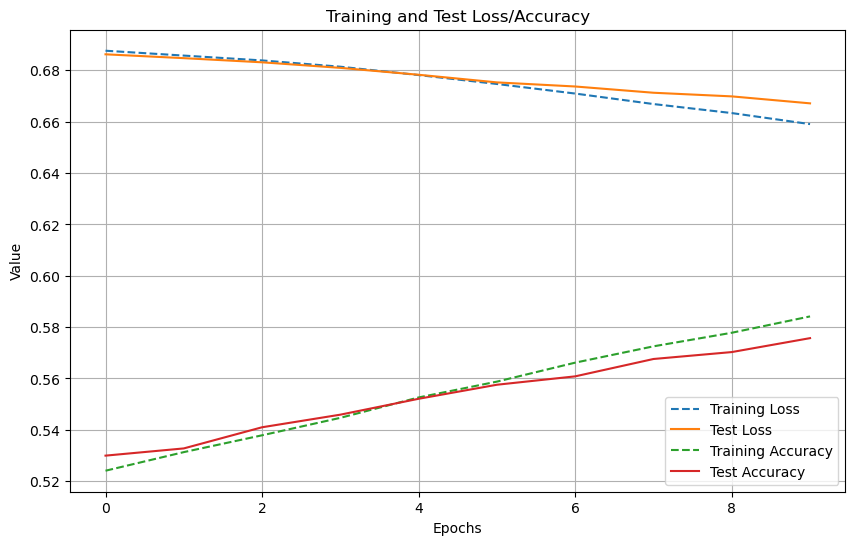

In [56]:
# LSTM 모델 구성

model = Sequential([
    LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    Dropout(0.2),
    LSTM(64, return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 학습 진행을 표시하기 위한 Callback 설정
class TQDMProgressBar(Callback):
    def on_train_begin(self, logs=None):
        self.epochs = self.params['epochs']
        self.tqdm = tqdm(total=self.epochs, desc='Training Progress')

    def on_epoch_end(self, epoch, logs=None):
        self.tqdm.update(1)
        self.tqdm.set_postfix(loss=logs['loss'])

    def on_train_end(self, logs=None):
        self.tqdm.close()

# 학습 과정 시각화 및 히스토리 저장
tqdm_callback = TQDMProgressBar()
history = model.fit(
    X_train, y_train, 
    validation_data=(X_test, y_test),
    epochs=EPOCHS, 
    batch_size=BATCH_SIZE, 
    callbacks=[tqdm_callback]
)

# Loss 및 Accuracy 그래프
plt.figure(figsize=(10, 6))

# Training 및 Test Loss
plt.plot(history.history['loss'], label='Training Loss', linestyle='--')
plt.plot(history.history['val_loss'], label='Test Loss', linestyle='-')

# Training 및 Test Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy', linestyle='--')
plt.plot(history.history['val_accuracy'], label='Test Accuracy', linestyle='-')

# 그래프 설정
plt.title('Training and Test Loss/Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

plt.show()

In [57]:
# 최종 평가 (Test Set)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

Test Loss: 0.6671, Test Accuracy: 0.5757
